## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pylab import rcParams
from datetime import datetime

style.use('ggplot')
rcParams['figure.figsize'] = 16,8

In [2]:
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

In [3]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
print(start)

2013-01-28 00:00:00


In [4]:
apple_stock = yf.download('AAPL', start=start, end=end)
google_stock = yf.download('GOOG', start=start, end=end)
microsoft_stock = yf.download('MSFT', start=start, end=end)
tesla_stock = yf.download('TSLA', start=start, end=end)

apple_stock.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-28 00:00:00-05:00,15.636786,16.186071,15.566429,16.065357,13.816011,785517600
2013-01-29 00:00:00-05:00,16.375000,16.435715,16.147142,16.366785,14.075236,571158000
2013-01-30 00:00:00-05:00,16.321428,16.521429,16.232143,16.315357,14.031010,417155200
2013-01-31 00:00:00-05:00,16.320715,16.402857,16.249287,16.267500,13.989853,319334400
2013-02-01 00:00:00-05:00,16.396786,16.410000,16.012501,16.200714,13.932415,539484400


In [5]:
apple_stock.sample(n=3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-09 00:00:00-05:00,174.910004,176.750000,173.919998,174.559998,173.552734,108923700
2016-05-10 00:00:00-04:00,23.332500,23.392500,23.027500,23.355000,21.627977,134747200
2017-02-16 00:00:00-05:00,33.917500,33.974998,33.709999,33.837502,31.804132,90338400


In [6]:
print(f'Data shape:{apple_stock.shape}\nData size: {apple_stock.size}')

Data shape:(2519, 6)
Data size: 15114


In [7]:
apple_stock.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
apple_stock.isna().any(axis=0)

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
apple_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2013-01-28 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2519 non-null   float64
 1   High       2519 non-null   float64
 2   Low        2519 non-null   float64
 3   Close      2519 non-null   float64
 4   Adj Close  2519 non-null   float64
 5   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.3 KB


In [10]:
apple_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,63.194053,63.913295,62.499515,63.233400,61.471676,1.674285e+08
std,48.911274,49.560086,48.278032,48.945184,49.495225,1.164215e+08
min,13.856071,14.271429,13.753571,13.947500,12.064587,3.519590e+07
25%,27.185000,27.402500,26.942500,27.182500,24.922186,9.102065e+07
50%,41.952499,42.522499,41.610001,42.084999,40.177887,1.295258e+08
75%,98.127499,99.248749,96.546249,97.498749,96.003201,2.016454e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.065523e+09


## Data Vizualization

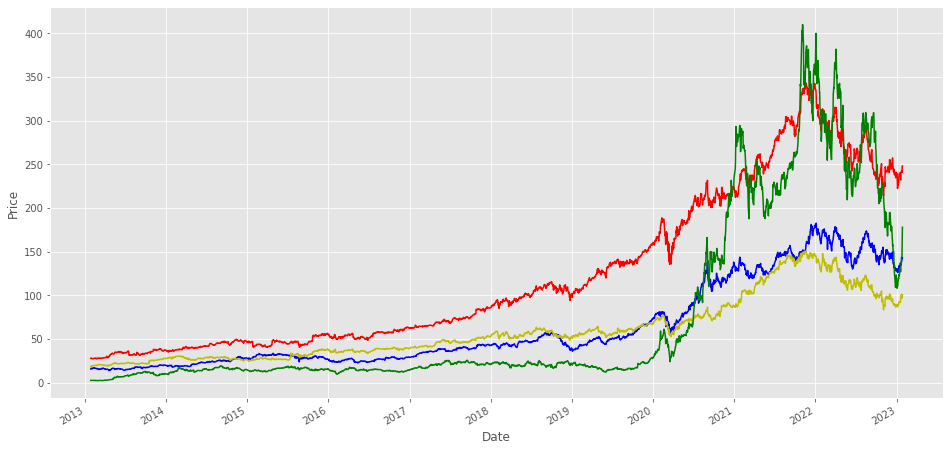

In [11]:
apple_stock['Open'].plot(color='b', ylabel='Price')
google_stock['Close'].plot(color='y')
microsoft_stock['Close'].plot(color='r')
tesla_stock['Close'].plot(color='g')

plt.show()

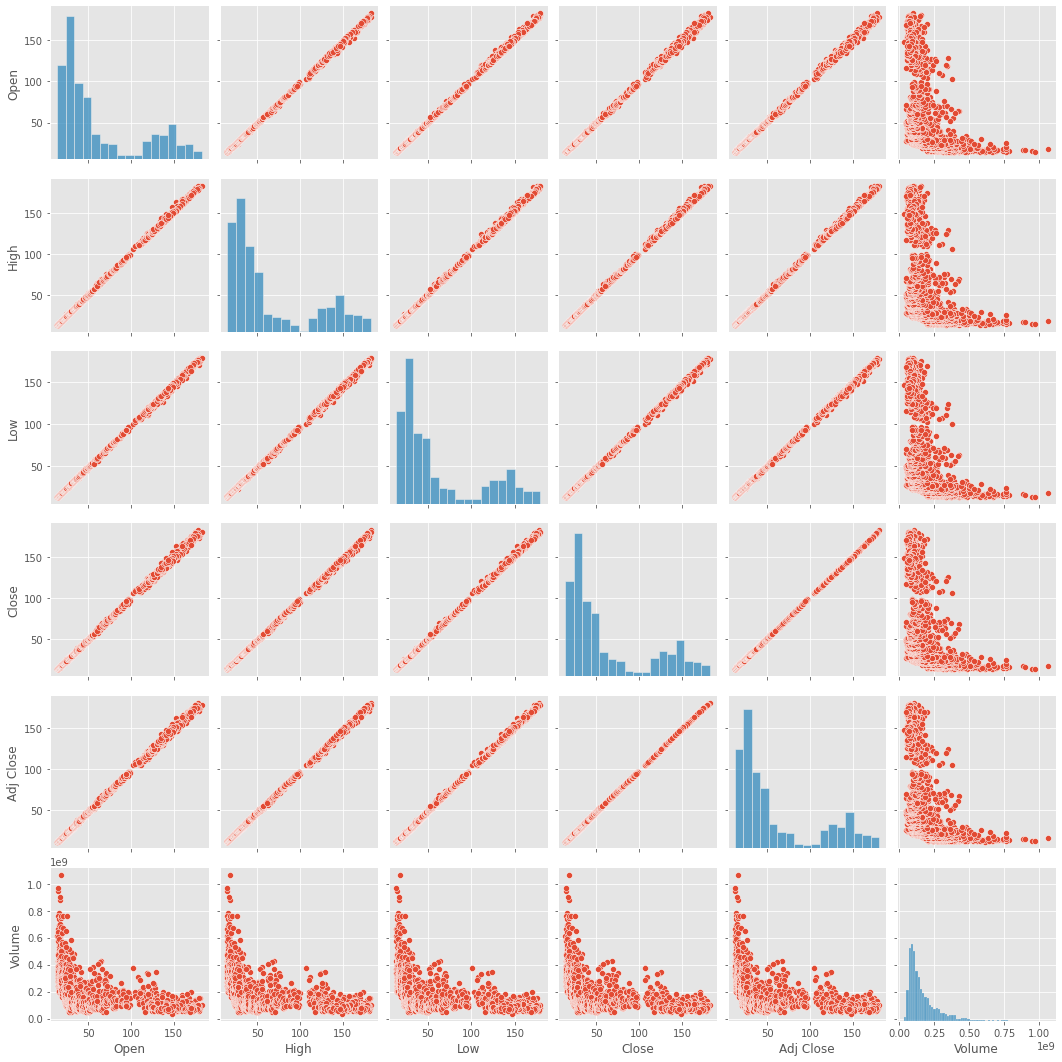

In [12]:
sns.pairplot(apple_stock)
plt.show()

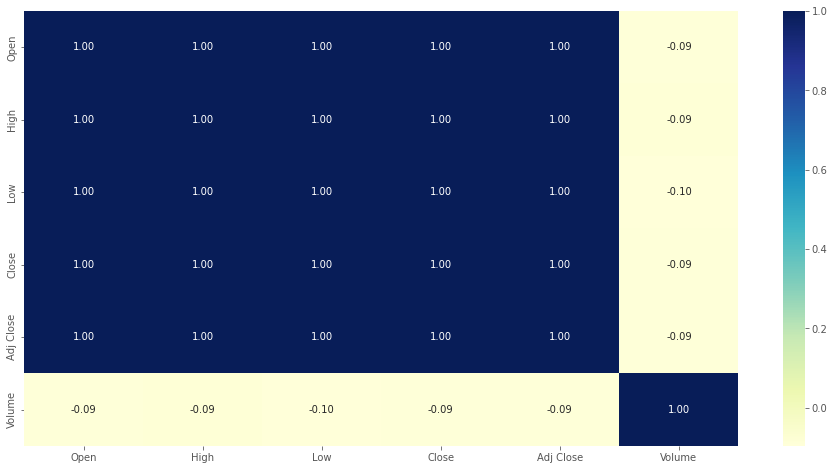

In [13]:
sns.heatmap(tesla_stock.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.show()

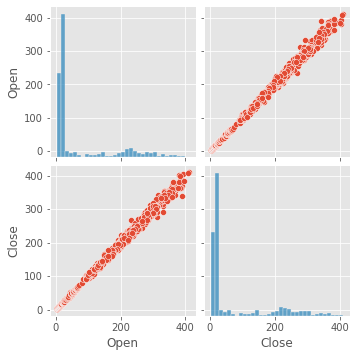

In [14]:
sns.pairplot(data=tesla_stock[['Open', 'Close']])
plt.show()

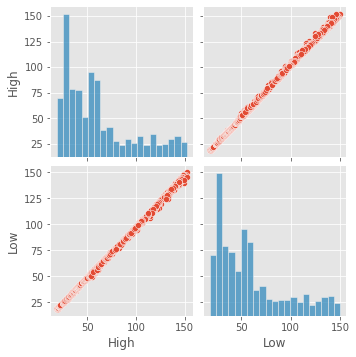

In [15]:
sns.pairplot(data=google_stock[['High', 'Low']])
plt.show()